<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierSeriesPhaseAngles_sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Fourier Series - Sound of Phase Angle Shifts </h1></b>

Dr. Bingsen Wang

12/2/2023
</center>

#Python Code
The Python code illustrates the summation of Fourier Series. How the phase angle shifts affect the sound.

Moviepy - Building video FourierAngleShiftSound.mp4.
MoviePy - Writing audio in FourierAngleShiftSoundTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video FourierAngleShiftSound.mp4



Moviepy - Done !
Moviepy - video ready FourierAngleShiftSound.mp4


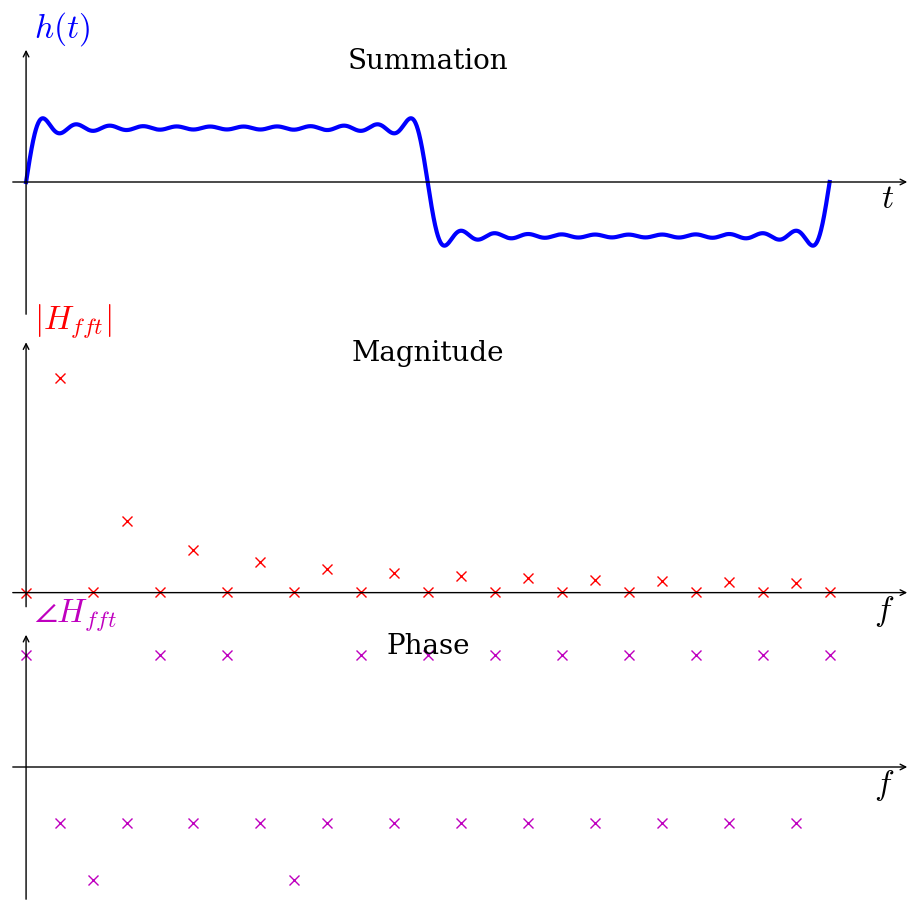

In [64]:
import matplotlib
from os import linesep
from scipy.io.wavfile import write
from moviepy.editor import *
from numpy import linspace,cos,pi,sin,random,c_,heaviside,fft,angle, abs,int16,array
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#functions
def h(theta,f,t): #square waveform with firing angle theta
  return (2*heaviside(sin(2*pi*f*t),0)-1)*heaviside(abs(sin(2*pi*f*t))-sin(theta),0)

def y_sum(mags,thetas,f,t): #sum of odd harmonics, nn: # of harmonics
  yy=0
  for i in range(len(mags)):
    yy += mags[i]*cos(2*pi*i*f*t +thetas[i])
  return yy

#spectrum
def spectrum(xt): #spectrum - magnitude and angle
  xfft = fft.rfft(xt)
  xfft_angle = angle(xfft)
  xfft_mag = abs(xfft)/len(xt)*2
  xfft_mag[0]=xfft_mag[0]*0.5 #adjust the dc component
  return xfft_mag,xfft_angle

#parameters
Nf = 10
Nh = 25 #number of harmononics
f1=1 #fundamental frequency for plotting
f1_snd = 440 #fundamentla frequency for sound
sr = 44100 #sampling rate
tpf = 1.0 # time per frame

t = linspace(0,1,2048) #for plot
tsnd=linspace(0,tpf,int(tpf*sr)) #time series for sampling
ht = h(0,f1,t)
hfft_mag,hfft_ph = spectrum(ht)
fser = linspace(0,1,Nh)
thetas=[]
for k in range(Nh):
  if k==0:
    thetas.append(hfft_ph[0:Nh])
  else:
    # random.seed(k)
    thetas.append(random.rand(Nh)*2*pi-pi)#randomized phase angle for each harmonic
soundTrack=[]
ysums=[]
for k in range(Nf):
  ysums.append(y_sum(hfft_mag[0:Nh],thetas[k],f1,t))
  soundTrack.extend(int16(y_sum(hfft_mag[0:Nh],thetas[k],f1_snd,tsnd)*32767*0.4))

fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax_frame = [[[0, 0.65, 1, .3], [-.02,1.1], [-2.5,2.5]], #summation
            [[0, .325,   1, .3], [-.02,1.1], [-.1,1.5]], #Spectrum - Magnitude
            [[0, 0,   1, .3], [-.02,1.1], [-pi*1.2,pi*1.2]], #Spectrum - Phase
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['$h(t)$', '$t$'],
        ['$|H_{fft}|$', '$f$'],
        [r'$\angle H_{fft}$', '$f$'],
        ] #variables for yx axes of each subplot
clst=['b','r','m'] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  if k==0:
    lines.append(ax.plot([], [],color='b', lw=3)[0])
  else:
    lines.append(ax.plot([], [], ls='',c=clst[k],marker='x',markersize=7,)[0]) #lines to plot
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  y_text=ax.text(0.01,ym,ax_lbl[k][0],size=24,va='bottom',color=clst[k]) #y label
ax_lst[0].text(0.5,ax_frame[0][2][1],'Summation',va='top',ha='center',size=20)
ax_lst[1].text(0.5,ax_frame[1][2][1],'Magnitude',va='top',ha='center',size=20)
ax_lst[2].text(0.5,ax_frame[2][2][1],'Phase',va='top',ha='center',size=20)
# animation function. This is called sequentially
def animate(i):
  lines[0].set_data(t,ysums[i])
  lines[1].set_data(fser,hfft_mag[0:Nh])
  lines[2].set_data(fser,thetas[i])
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "FourierAngleShift"
writervideo = animation.FFMpegWriter(fps=1)
anim.save(fn+'.mp4', writer=writervideo,dpi = 120)
write(fn+'.wav', sr,array(soundTrack))
audio = AudioFileClip(fn+'.wav',fps=sr)
video = VideoFileClip(fn+'.mp4')
final = video.set_audio(audio)
# final.ipython_display()
final.write_videofile(fn+"Sound.mp4")